In [67]:
import pandas as pd

In [68]:
soccer_data = pd.read_csv(r"C:\Users\jonat\OneDrive\Desktop\DataMiningFinalProjectActually\fifa_eda_stats.csv\fifa_eda_stats.csv")
soccer_data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [69]:
soccer_data.isnull().sum()

ID                              0
Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                          241
Value                           0
Wage                            0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
Crossing                       48
Finishing                      48
HeadingAccuracy                48
ShortPassing                   48
Volleys                        48
Dribbling                      48
Curve                          48
FKAccuracy    

In [70]:
soccer_data.shape

(18207, 57)

The goal of this model is to predict each players' value based off their demographic and attributes. To start with preprocessing, I will eliminate all the goalkeepers (GK) because the model may be confused if it has to analyze field player attributes and goalkeepers, so I am going to keep it simple and look at only field players for the sake of this experiment

In [71]:
# drop all goalkeeprs from the dataset
fieldplayer_data = soccer_data[soccer_data['Position'] != 'GK']

In [72]:
# verify that the goalkeepers were actually dropped

fieldplayer_data['Position'].value_counts()

Position
ST     2152
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
LAM      21
RAM      21
RF       16
LF       15
Name: count, dtype: int64

Now that the goalkeepers are dropped, I will drop any columns that are irrelevant to my project.

In [73]:
# look at the columns
fieldplayer_data.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause'],
      dtype='object')

In [74]:
# drop columns that are not helpful for my prediction model
cols_to_drop = ['ID', 'Name', 'Overall', 'Potential', 'Jersey Number', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']

I chose to drop ID and Name as they are purely used for identification, so they will not affect my prediction. Then I chose to drop Overall and Potential because I feel like they could heavily influence my model and even though they may make the model quite accurate, they are a product of the attributes, so I would rather work solely with the attributes and demographics than use the overall and potential. From there, I also chose jersey number because it has no effect and then I dropped the GK stats because I have no goalkeepers left in my dataset

In [75]:
filtered_player_stats = fieldplayer_data.drop(columns=cols_to_drop)
filtered_player_stats.head()

,Age,Nationality,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,...,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Release Clause
0,31,Argentina,FC Barcelona,€110.5M,€565K,Left,5.0,4.0,4.0,Medium/ Medium,...,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,€226.5M
1,33,Portugal,Juventus,€77M,€405K,Right,5.0,4.0,5.0,High/ Low,...,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,€127.1M
2,26,Brazil,Paris Saint-Germain,€118.5M,€290K,Right,5.0,5.0,5.0,High/ Medium,...,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,€228.1M
4,27,Belgium,Manchester City,€102M,€355K,Right,4.0,5.0,4.0,High/ High,...,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,€196.4M
5,27,Belgium,Chelsea,€93M,€340K,Right,4.0,4.0,4.0,High/ Medium,...,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,€172.1M


In [76]:
# check for nulls now that we have a filtered dataset
filtered_player_stats.isnull().sum()

Age                             0
Nationality                     0
Club                          208
Value                           0
Wage                            0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Position                       60
Joined                       1431
Loaned From                 15007
Contract Valid Until          256
Height                         48
Weight                         48
Crossing                       48
Finishing                      48
HeadingAccuracy                48
ShortPassing                   48
Volleys                        48
Dribbling                      48
Curve                          48
FKAccuracy                     48
LongPassing                    48
BallControl                    48
Acceleration                   48
SprintSpeed                    48
Agility       

To handle some of the missing values, drop some more columns that will provide minimal effect to the model and would be more complicated to deal with so we have no nulls

In [77]:
new_cols_to_drop = ['Loaned From', 'Release Clause', 'Joined', 'Contract Valid Until']

In [78]:
# drop these columns as well

filtered_player_stats = filtered_player_stats.drop(columns=new_cols_to_drop)

With the null values from club and position, fill in with "No club" and "unknown position"

In [79]:
filtered_player_stats['Club'] = filtered_player_stats['Club'].fillna('No Club')
filtered_player_stats['Position'] = filtered_player_stats['Position'].fillna('Unknown')

For all the attributes that have 48 missing values, I assume these are incomplete player profiles, so because the dataset is fairly large, we can drop 48 rows and see little effect, so I will just drop these

In [80]:
# let's see if these past techniques worked before we go in and drop the remaining rows
filtered_player_stats.isnull().sum()

Age                          0
Nationality                  0
Club                         0
Value                        0
Wage                         0
Preferred Foot              48
International Reputation    48
Weak Foot                   48
Skill Moves                 48
Work Rate                   48
Body Type                   48
Position                     0
Height                      48
Weight                      48
Crossing                    48
Finishing                   48
HeadingAccuracy             48
ShortPassing                48
Volleys                     48
Dribbling                   48
Curve                       48
FKAccuracy                  48
LongPassing                 48
BallControl                 48
Acceleration                48
SprintSpeed                 48
Agility                     48
Reactions                   48
Balance                     48
ShotPower                   48
Jumping                     48
Stamina                     48
Strength

It worked so let's go ahead and drop these 48 values

In [81]:
# drop the remaining rows with null values
filtered_player_stats = filtered_player_stats.dropna()

# check that there are no more nulls
filtered_player_stats.isnull().sum()

Age                         0
Nationality                 0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Position                    0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions                   0
Balance                     0
ShotPower                   0
Jumping                     0
Stamina                     0
Strength                    0
LongShots 

Our processes worked and we have no more nulls, now let's check the shape to see what we are working with for the model

In [82]:
filtered_player_stats.shape

(16134, 43)

Now, the target variable is Value, so let's see how it is formatted throughout the dataset

In [83]:
filtered_player_stats['Value'].unique()

array(['€110.5M', '€77M', '€118.5M', '€102M', '€93M', '€67M', '€80M',
       '€51M', '€76.5M', '€44M', '€60M', '€63M', '€89M', '€83.5M', '€78M',
       '€51.5M', '€64.5M', '€27M', '€81M', '€69.5M', '€59.5M', '€62M',
       '€73.5M', '€59M', '€46M', '€43M', '€57M', '€24M', '€64M', '€62.5M',
       '€52M', '€38M', '€45M', '€34M', '€46.5M', '€61M', '€44.5M',
       '€56.5M', '€53M', '€50M', '€55M', '€36.5M', '€45.5M', '€43.5M',
       '€35M', '€30M', '€39M', '€18M', '€21.5M', '€50.5M', '€54M',
       '€40.5M', '€37.5M', '€28.5M', '€37M', '€26M', '€30.5M', '€33M',
       '€38.5M', '€35.5M', '€9M', '€15.5M', '€22M', '€14M', '€32M',
       '€42.5M', '€31.5M', '€42M', '€29.5M', '€31M', '€24.5M', '€27.5M',
       '€25M', '€29M', '€16.5M', '€23M', '€4.2M', '€40M', '€41M', '€28M',
       '€22.5M', '€34.5M', '€32.5M', '€20M', '€26.5M', '€19M', '€25.5M',
       '€21M', '€17.5M', '€11.5M', '€8M', '€6.5M', '€20.5M', '€23.5M',
       '€18.5M', '€19.5M', '€17M', '€12.5M', '€15M', '€4.8M', '€16M',
    

We also need to convert Wage into usable variables, so we need to see what those values look like as well

In [84]:
filtered_player_stats['Wage'].unique()

array(['€565K', '€405K', '€290K', '€355K', '€340K', '€420K', '€455K',
       '€380K', '€205K', '€125K', '€285K', '€225K', '€145K', '€315K',
       '€200K', '€300K', '€215K', '€100K', '€255K', '€165K', '€265K',
       '€160K', '€245K', '€130K', '€115K', '€210K', '€230K', '€250K',
       '€135K', '€155K', '€260K', '€240K', '€195K', '€180K', '€175K',
       '€150K', '€190K', '€185K', '€21K', '€82K', '€73K', '€92K', '€77K',
       '€110K', '€88K', '€96K', '€170K', '€66K', '€235K', '€28K', '€105K',
       '€38K', '€81K', '€57K', '€15K', '€63K', '€22K', '€84K', '€120K',
       '€90K', '€72K', '€93K', '€45K', '€51K', '€31K', '€75K', '€25K',
       '€140K', '€53K', '€95K', '€80K', '€43K', '€60K', '€85K', '€64K',
       '€67K', '€18K', '€70K', '€91K', '€20K', '€49K', '€87K', '€74K',
       '€86K', '€26K', '€29K', '€55K', '€94K', '€11K', '€59K', '€46K',
       '€39K', '€36K', '€98K', '€54K', '€33K', '€68K', '€58K', '€27K',
       '€40K', '€41K', '€44K', '€78K', '€32K', '€19K', '€1K', '€61K',
   

These values need to be cleaned and displayed as integers

In [85]:
# clean the Value and Wage columns so they can be used in the model and converted to float object type
import numpy as np
import re

def clean_value(val):
    if not isinstance(val, str):
        return np.nan

    # remove spaces
    val = val.strip()
    # clean the currency symbols                                
    val = val.replace('€', '').replace('EUR', '')
    # remove commas    
    val = val.replace(',', '').strip()

    # return 0 for values of 0
    if val == "0":
        return 0.0

    # account for any abnormal formats that caused problems earlier
    match = re.match(r"([\d\.]+)\s*([MK]?)$", val)
    if not match:
        return np.nan

    num, suffix = match.groups()
    num = float(num)

    # adjust for million and thousand value suffixes
    if suffix == "M":
        return num * 1_000_000
    if suffix == "K":
        return num * 1_000

    # return the num
    return num



In [86]:
# apply the function to the value and wage columns so we can test if the values were cleaned properly

filtered_player_stats['Value'] = (
    filtered_player_stats['Value'].apply(clean_value).astype('float64')
)

filtered_player_stats['Wage'] = (
    filtered_player_stats['Wage'].apply(clean_value).astype('float64')
)

In [87]:
# look at the first 10 values so we can see if it worked in general
filtered_player_stats['Value'].head(10).to_list()

[110500000.0,
 77000000.0,
 118500000.0,
 102000000.0,
 93000000.0,
 67000000.0,
 80000000.0,
 51000000.0,
 77000000.0,
 76500000.0]

In [88]:
filtered_player_stats['Wage'].head(10).to_list()

[565000.0,
 405000.0,
 290000.0,
 355000.0,
 340000.0,
 420000.0,
 455000.0,
 380000.0,
 205000.0,
 355000.0]

It seems to have worked, so we can move on to the next step now, which will be to process the height and weight variables

In [101]:
# lets see how the values looks for height and weight
filtered_player_stats[['Height', 'Weight']].head(10)

,Height,Weight
0,5'7,159lbs
1,6'2,183lbs
2,5'9,150lbs
4,5'11,154lbs
5,5'8,163lbs
6,5'8,146lbs
7,6'0,190lbs
8,6'0,181lbs
10,6'0,176lbs
11,6'0,168lbs


In [102]:
# clean the height column by converting to centimeters
def height_to_cm(val):
    if isinstance(val, str):
        try:
            feet, inches = val.split("'")
            feet = int(feet)
            inches = int(inches)
            return feet * 30.48 + inches * 2.54
        except:
            return np.nan
    return np.nan

# apply
filtered_player_stats['Height'] = filtered_player_stats['Height'].apply(height_to_cm)

In [103]:
# clean the weight column by converting to kilograms
def weight_to_kg(val):
    if isinstance(val, str):
        val = val.replace('lbs', '').strip()
        try:
            return float(val) * 0.453592   # pounds → kg
        except:
            return np.nan
    return np.nan

# Apply
filtered_player_stats['Weight'] = filtered_player_stats['Weight'].apply(weight_to_kg)


Let's see if these are cleaned up

In [104]:
filtered_player_stats[['Height', 'Weight']].head(10)

,Height,Weight
0,170.18,72.121128
1,187.96,83.007336
2,175.26,68.038800
4,180.34,69.853168
5,172.72,73.935496
6,172.72,66.224432
7,182.88,86.182480
8,182.88,82.100152
10,182.88,79.832192
11,182.88,76.203456


In [105]:
filtered_player_stats.dtypes

Age                           int64
Nationality                  object
Club                         object
Value                       float64
Wage                        float64
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Position                     object
Height                      float64
Weight                      float64
Crossing                    float64
Finishing                   float64
HeadingAccuracy             float64
ShortPassing                float64
Volleys                     float64
Dribbling                   float64
Curve                       float64
FKAccuracy                  float64
LongPassing                 float64
BallControl                 float64
Acceleration                float64
SprintSpeed                 float64
Agility                     float64
Reactions                   

Since that worked, now we need to encode the categorical variables, so they can be used in the XGBoost prediction model. The easiest way is to use one-hot encoding, but with columns like Nationality and Club, there could be hundreds of new columns, which will cause my dataset to be massive and it would make the training process last much longer and it could introduce bias and error in splitting later on. So for the more diverse columns, I will utilize target encoding to get the best result. But for columns like Position that are capped to a few different values, I will still use OHE.

In [89]:
# look at the numerical v. categorical columns
filtered_player_stats.dtypes

Age                           int64
Nationality                  object
Club                         object
Value                       float64
Wage                        float64
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Position                     object
Height                       object
Weight                       object
Crossing                    float64
Finishing                   float64
HeadingAccuracy             float64
ShortPassing                float64
Volleys                     float64
Dribbling                   float64
Curve                       float64
FKAccuracy                  float64
LongPassing                 float64
BallControl                 float64
Acceleration                float64
SprintSpeed                 float64
Agility                     float64
Reactions                   

Prepare for the encoding process

In [90]:
#!pip install category_encoders

In [91]:
# set the columns that need to be target encoded

cols_to_targetencode = ['Club', 'Nationality']

Split the data so we can begin to encode variables and train the model

In [106]:
# import
from sklearn.model_selection import train_test_split

# set X and y
X = filtered_player_stats.drop('Value', axis=1)
y = filtered_player_stats['Value']

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Now that our data is split, we can begin the encoding process, with target encoding first and then one-hot encoding for the columns with fewer possible values

In [ ]:
from category_encoders import TargetEncoder

# get encoder set up
te = TargetEncoder(cols=cols_to_targetencode, smoothing=0.3)

# fit on the training data, as it has the values that need to be encoded
X_train[cols_to_targetencode] = te.fit_transform(X_train[cols_to_targetencode], y_train)

# transform the test case using the results from the training data
X_test[cols_to_targetencode] = te.transform(X_test[cols_to_targetencode])


Now that our target encoding is down, let's use one-hot encoding on these columns that won't dramatically expand the dataset

In [ ]:
# import
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# cols that need to be one-hot encoded
col_for_ohe = ['Preferred Foot', 'Position', 'Body Type', 'Work Rate']

# set up the transformer to encode these columns
preprocess = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(handle_unknown='ignore'), col_for_ohe)
    ],
    remainder='passthrough'
)

# set the training and testing data with the new columns
X_train = preprocess.fit_transform(X_train)
X_test = preprocess.transform(X_test)

Now that the data is set and ready, it's time to create the model, fit it with the training data, and then find our predictions using the test data


In [ ]:
# import
from xgboost import XGBRegressor

# create the model with optimal hyperparameters
model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# fit the model
model.fit(X_train, y_train)

# find predictions
preds = model.predict(X_test)

Now that we have our predictions, it is time to analyze our results

In [ ]:
# import
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# find the mean absolute error, root mean squared error, and the r-squared value

mae =mean_absolute_error(y_test, preds) # will give the average error in euros
rmse = np.sqrt(mean_squared_error(y_test, preds)) # the average prediction error in euros (penalizes larger errors more)
r2 = r2_score(y_test, preds) # shows much variance in the target variable is explained by the model, 1 is perfect prediction and 0 is baseline

print(f"Mean Absolute Error: {mae:,.0f} Euros")
print(f"Root Mean Squared Error: {rmse:,.0f} Euros")
print(f"R-squared: {r2:.4f}")

Mean Absolute Error: 481,252 Euros
Root Mean Squared Error: 1,591,594 Euros
R-squared: 0.9358


What do these values tell us? Mean Absolute Error is a good score, as with the high numbers in our model, 500k is not far off. And then The Root Mean Squared Error is also a good score, but because it is a larger number than the MAE, that shows that the predicted values for the top players (Lionel Messi, Cristiano Ronaldo) are further off than the players with smaller values. And then the R-squared value shows that the model explains about 94% of the variation in the player values, which is a strong performance from the model.

In [ ]:
# import
import matplotlib.pyplot as plt

Now that we have the scores, let's create a line-graph showing the difference between Actual and Predicted values. What we can learn from the graph is that dots close to the red diagonal are accurate predictions, with dots above are where the model overestimates the players' value, and values below are underestimations. 

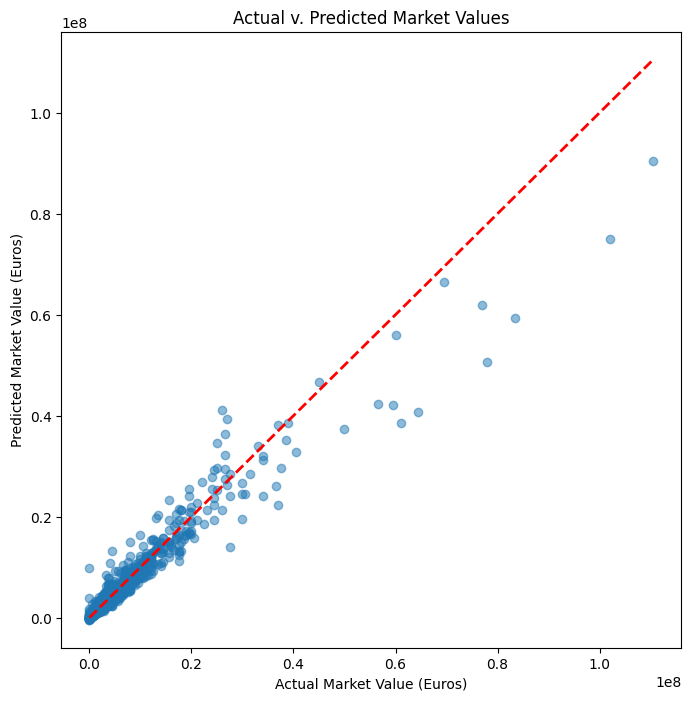

In [114]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, preds, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)
plt.xlabel('Actual Market Value (Euros)')
plt.ylabel('Predicted Market Value (Euros)')
plt.title("Actual v. Predicted Market Values")
plt.show()

As we can see from the graph, the model typically predicts accurately, with some values that were underestimated, which could be the players' with higher values like Messi and Ronaldo, as evidenced by the RMSE score and analysis. 